### Calling de packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
seed_value = 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)
# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

### Calling the dataset

In [5]:
dados = pd.read_csv('piracicaba_2012_2021_ETo.csv', sep = ';')
dados

,date,latitude_graus,longitude_graus,altitude,julian_day,day,T_mean,RH_mean,U_z,T_max,...,svp,svp_tmin,svp_tmax,avp,delta_svp,atmos_pres,psy_const,shf,Tmean_K,ETo_PM
0,01/01/2012,-47.63,-22.7,546,1,1,21.5,99.9,0.9,24.5,...,2.564420,2.197393,3.074649,2.633385,0.156903,95.010269,0.063182,0,294.65,0.375108
1,02/01/2012,-47.63,-22.7,546,2,2,22.5,82.7,1.6,28.7,...,2.725588,1.901195,3.936754,2.413992,0.165483,95.010269,0.063182,0,295.65,3.999193
2,03/01/2012,-47.63,-22.7,546,3,3,24.5,73.0,0.9,31.4,...,3.074649,1.974877,4.595917,2.398340,0.183835,95.010269,0.063182,0,297.65,4.947835
3,04/01/2012,-47.63,-22.7,546,4,4,25.7,70.1,0.7,33.6,...,3.302286,2.143153,5.201930,2.574452,0.195648,95.010269,0.063182,0,298.85,4.714384
4,05/01/2012,-47.63,-22.7,546,5,5,23.5,80.3,0.7,31.5,...,2.895531,2.281006,4.622069,2.771584,0.174456,95.010269,0.063182,0,296.65,2.572930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,12/27/2021,-47.63,-22.7,546,3649,27,24.5,72.4,1.8,32.8,...,3.074649,2.183722,4.973992,2.591092,0.183835,95.010269,0.063182,0,297.65,3.653819
3649,12/28/2021,-47.63,-22.7,546,3650,28,21.4,87.6,1.7,27.2,...,2.548771,2.129777,3.607388,2.512879,0.156067,95.010269,0.063182,0,294.55,1.490007
3650,12/29/2021,-47.63,-22.7,546,3651,29,23.5,75.2,1.4,31.1,...,2.895531,2.025376,4.518232,2.460397,0.174456,95.010269,0.063182,0,296.65,4.185023
3651,12/30/2021,-47.63,-22.7,546,3652,30,21.8,89.1,0.9,24.7,...,2.611872,2.309488,3.111610,2.415099,0.159437,95.010269,0.063182,0,294.95,0.867022


In [6]:
#Preprocessing
del dados['svp']
del dados['svp_tmin']
del dados['svp_tmax']
del dados['avp']
del dados['delta_svp']
del dados['atmos_pres']
del dados['psy_const']
del dados['shf']
del dados['Tmean_K']
dados = dados.dropna()
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3622 entries, 0 to 3652
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             3622 non-null   object 
 1   latitude_graus   3622 non-null   float64
 2   longitude_graus  3622 non-null   float64
 3   altitude         3622 non-null   int64  
 4   julian_day       3622 non-null   int64  
 5   day              3622 non-null   int64  
 6   T_mean           3622 non-null   float64
 7   RH_mean          3622 non-null   float64
 8   U_z              3622 non-null   float64
 9   T_max            3622 non-null   float64
 10  RH_max           3622 non-null   float64
 11  T_min            3622 non-null   float64
 12  RH_min           3622 non-null   float64
 13  precipitation    3622 non-null   float64
 14  R_s              3622 non-null   float64
 15  R_n              3622 non-null   float64
 16  ETo_PM           3622 non-null   float64
dtypes: float64(13)

### Calling sklearn packages

In [7]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [8]:
#features and label
X = dados[['T_mean', 'RH_mean', 'U_z', 'R_n']]
y = dados['ETo_PM']
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
#escale the data
scaler = StandardScaler()
X_trained = scaler.fit_transform(X_train)
X_testscaled = scaler.fit_transform(X_test)
X_scaled = scaler.fit_transform(X)

### Running the model

In [9]:
hgbr = HistGradientBoostingRegressor(random_state = 42).fit(X_trained, y_train) 

In [10]:
#Train score
hgbr.score(X_trained, y_train)

0.9955533308391745

In [11]:
#Test score
hgbr.score(X_testscaled, y_test)

0.9892875107289224

In [12]:
#Validation score using k-fold (cross validation (cv) - k = 10 folders)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(hgbr, X, y, cv = 10, scoring = 'r2')
#scores = acurácia de todos os folders 
print('%0.2f accuracy with a standar deviation of %0.2f' % (scores.mean(), scores.std()))
#media de todos os 10 folders e seu desvio padrão

0.99 accuracy with a standar deviation of 0.00


### Results of the model

In [13]:
print('A precisão do modelo de treino foi: {:.2f}%' .format(100*(hgbr.score(X_trained, y_train))))
print('A precisão do modelo de teste foi: {:.2f}%' .format(100*(hgbr.score(X_testscaled, y_test))))
print('A precisão do modelo de validação foi: {:.2f}%' .format(100*(scores.mean())))
print('O RMSE do modelo de treino foi: {:.2f}' .format((mean_squared_error(y_train, hgbr.predict(X_trained), squared=False))))
print('O RMSE do modelo de teste foi: {:.2f}' .format((mean_squared_error(y_test, hgbr.predict(X_testscaled), squared=False))))

A precisão do modelo de treino foi: 99.56%
A precisão do modelo de teste foi: 98.93%
A precisão do modelo de validação foi: 98.78%
O RMSE do modelo de treino foi: 0.09
O RMSE do modelo de teste foi: 0.14


### Salvando o modelo

In [14]:
import joblib as jb

In [15]:
#Save the model as a pickle in a file
jb.dump(hgbr, 'eto_hgbr.pkl')

['eto_hgbr.pkl']

### Calculando ETo com base no algoritmo treinado

In [21]:
#open new datas
df = pd.read_csv('dados_algoritmos.csv', sep = ';')
df

,date,latitude_graus,longitude_graus,altitude,julian_day,day,T_mean,RH_mean,U_z,R_n
0,06/14/2022,-47.63,-22.7,546,165,14,16.90,66.27,0.43,5.546
1,06/15/2022,-47.63,-22.7,546,166,15,17.75,69.88,0.36,4.672
2,06/16/2022,-47.63,-22.7,546,167,16,19.90,69.81,0.29,5.937
3,06/17/2022,-47.63,-22.7,546,168,17,24.00,66.40,0.52,6.359
4,06/18/2022,-47.63,-22.7,546,169,18,19.05,83.05,0.41,3.084
5,06/19/2022,-47.63,-22.7,546,170,19,20.30,80.74,0.46,4.630
6,06/20/2022,-47.63,-22.7,546,171,20,17.05,86.45,0.26,1.510
7,06/21/2022,-47.63,-22.7,546,172,21,21.80,73.86,0.58,6.780
8,06/22/2022,-47.63,-22.7,546,173,22,21.45,66.75,0.57,6.380
9,06/23/2022,-47.63,-22.7,546,174,23,21.00,68.09,0.44,6.140


In [22]:
#features and label
X_new = df[['T_mean', 'RH_mean', 'U_z', 'R_n']]
scaler = StandardScaler()
X_scaled_new = scaler.fit_transform(X_new)

In [23]:
predicted_values = pd.DataFrame(hgbr.predict(X_scaled_new), columns=['predict_result'])
predicted_values

,predict_result
0,2.934938
1,1.954884
2,3.142804
3,4.586824
4,0.536302
5,1.574862
6,-0.224409
7,3.798703
8,4.226414
9,3.704841


In [20]:
predicted_values.to_excel('ETo_predict_HGBR.xlsx', index = False)

In [22]:
#Turning the label column in a DataFrame (ETo_PM)
y = pd.DataFrame(y) 
type(y)
y

,ETo_PM
0,0.375108
1,3.999193
2,4.947835
3,4.714384
4,2.572930
...,...
3648,3.653819
3649,1.490007
3650,4.185023
3651,0.867022


## Making a regression with true and predicted values

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#(ETo_PM, ETo_HGBR)
model.fit(y, predicted_values)
model.intercept_, model.coef_

(array([0.03136318]), array([[0.98735759]]))

In [24]:
line = np.linspace(0, 8, 100)

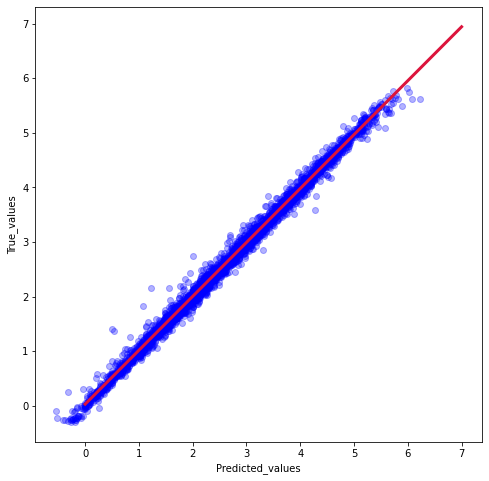

In [25]:
x_new = np.linspace(0, 7, 100)
y_new = model.predict(x_new[:, np.newaxis])

# plot the results
plt.figure(figsize=(8, 8))
ax = plt.axes()
ax.scatter(y, predicted_values, color = 'blue', alpha=0.3)
ax.plot(x_new, y_new, color = 'crimson', linewidth = 3)


ax.set_xlabel('Predicted_values')
ax.set_ylabel('True_values')

ax.axis('tight')
plt.show()

## Comparing true ETo-PM and predicted ETo

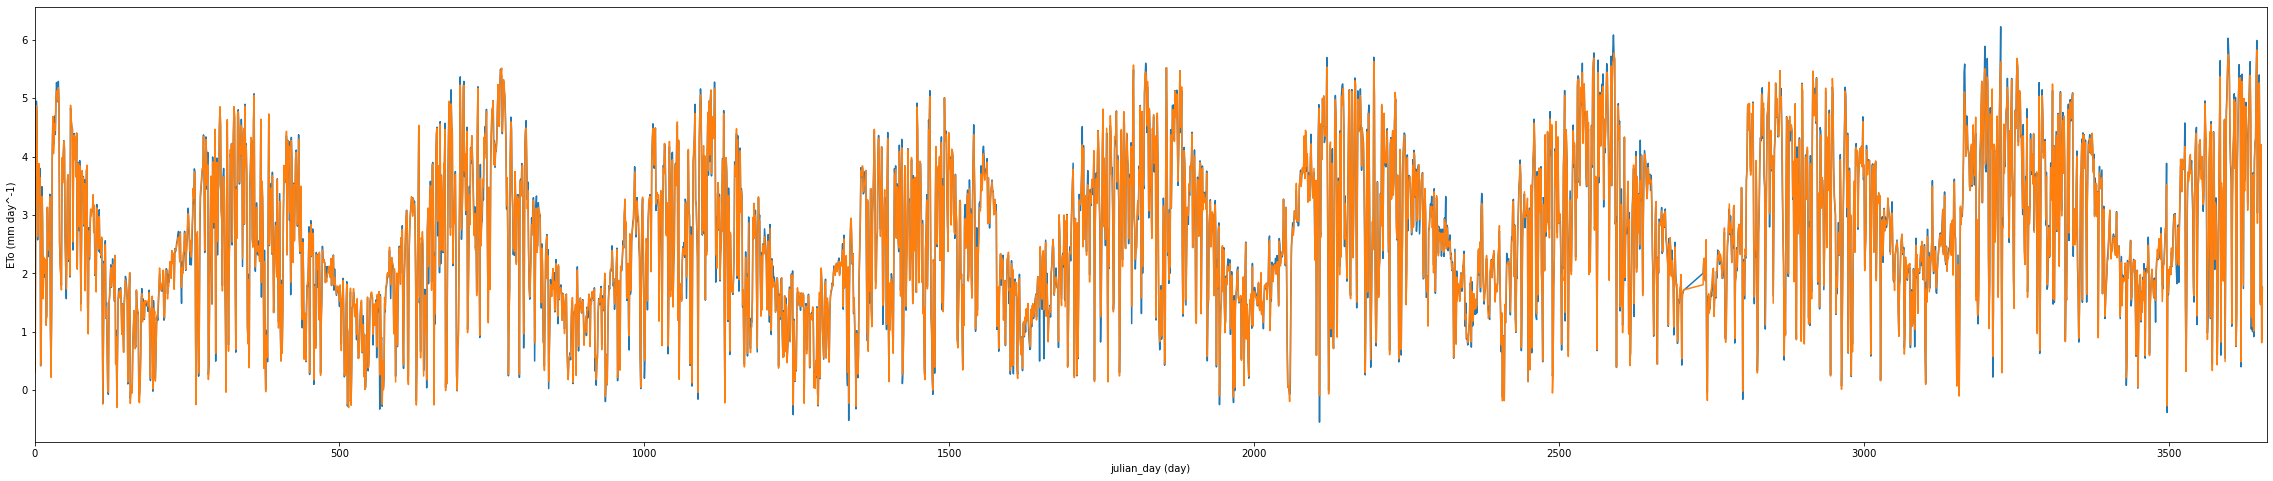

In [26]:
plt.figure(figsize = (40, 8))
ax = plt.axes()
ax.plot(dados['julian_day'], dados['ETo_PM'])
ax.plot(dados['julian_day'], regr.predict(X_scaled))

#axis labels
ax.set_xlabel('julian_day (day)')
ax.set_ylabel('ETo (mm day^-1)')

#limite dos eixos
ax.axis(xmin = 0, xmax = 3660)
plt.savefig('MLPR.png')
plt.show()